# EDA for casp14 Dataset
Goal: Perform exploratory data analysis (EDA) on the casp14 dataset to understand the dataset format and the frequency of secondary structure elements in the dataset.

In [11]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
file_dir = '../Data/Original/casp14_dataset.csv'
df_ori = pd.read_csv(file_dir, sep=',', header=0)
df_ori

,pdb,aa,chain,q3,q8,asa,rsa,phi,psi
0,7D2O,K,A,C,C,228.0,0.966102,360.0,160.7
1,7D2O,P,A,C,C,61.0,0.383648,-69.8,145.7
2,7D2O,T,A,C,C,126.0,0.732558,161.0,-55.7
3,7D2O,E,A,C,S,180.0,0.807175,-57.6,-67.6
4,7D2O,N,A,C,C,131.0,0.671795,131.6,176.8
...,...,...,...,...,...,...,...,...,...
22173,7K7W,P,A,C,C,83.0,0.522013,-63.1,152.0
22174,7K7W,F,A,B,B,7.0,0.029167,141.5,166.1
22175,7K7W,L,A,C,C,75.0,0.373134,101.8,151.7
22176,7K7W,L,A,C,C,25.0,0.124378,115.9,-1.3


In [13]:
# Group the data by PDB code
grouped = df_ori.groupby('pdb')

processed_data = []

for _, group in grouped:
    # Combine the amino acid and secondary structure sequences
    combined_aa = ''.join(group['aa'].tolist())
    combined_q8 = ''.join(group['q8'].tolist())
    combined_q3 = ''.join(group['q3'].tolist())
    protein_length = len(combined_aa)

    # Append the processed data to the list
    processed_data.append({
        'seq': combined_aa,
        'dssp8': combined_q8,
        'dssp3': combined_q3
    })

df = pd.DataFrame(processed_data)

In [14]:
df

,seq,dssp8,dssp3
0,MRIDELVPADPRAVSLYTPYYSQANRRRYLPYALSLYQGSSIEGSR...,CCGGGSSCCCHHHHHHHSCCCCSSSCCTHHHHHHHIIIIICEEEEE...,CCHHHCCCCCHHHHHHHCCCCCCCCCCCHHHHHHHHHHHHCBBBBB...
1,ACKIENIKYKGKEVESKLGSQLIDIFNDLDRAKEEYDKLSSPEFIA...,CCCCCCSTTTTSSCCCHHHHHHHHHHCCHHHHHHHHHHHTSHHHHH...,CCCCCCCCCCCCCCCCHHHHHHHHHHCCHHHHHHHHHHHCCHHHHH...
2,SIFSYITESTGTPSNATYTYVIERWDPETSGILNPaYGWPVaYVTV...,CEEEEEEEEEECSSEEEEEEEEEEECCCCSCCBCTTTTSSSCEEEE...,CBBBBBBBBBBCCCBBBBBBBBBBBCCCCCCCBCCCCCCCCCBBBB...
3,DLPNNaLNASSLKbEIKGISTYNVYYQVENNGVIYSaVSDSAEGLE...,CTTTTTSCCTTSEEEEEEECSSCEEEEEEETTEEEEEEESCCTTCT...,CCCCCCCCCCCCBBBBBBBCCCCBBBBBBBCCBBBBBBBCCCCCCC...
4,CAWIPAKPLVQGATTAQPIPGPVPVANGSIFQSAQPINYGYQPLFE...,CTTSCBCCSSCSCSCCCCCCCCCCCCBSCSCCCCCCCCCCCCCSSS...,CCCCCBCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCC...
5,KPTENNEDFNIVAVASNFATTDLDADRGKLPGKKLPLEVLKEMEAN...,CCCSCCCSSCCHHHHHHHCCSTTHHHHTTCCTTCCCHHHHHHHHHH...,CCCCCCCCCCCHHHHHHHCCCCCHHHHCCCCCCCCCHHHHHHHHHH...
6,QEaSLQSbTQHQPYVVDDPcPIHFYSKWYIRVGARKSAPLIELdVD...,CCEEEEEECTTSEEECCCCSCTTCEEEEEEEETTBTTSCEEESSCC...,CCBBBBBBCCCCBBBCCCCCCCCCBBBBBBBBCCBCCCCBBBCCCC...
7,HHHGTENLYFQG!ATMAAQSLLSIPVEYRSQVWCRANLPYPPAPQL...,CCCHHHHHHTCCCCHHHHHHHHTSCGGGTTTCEEEESSCCCCCSSC...,CCCHHHHHHCCCCCHHHHHHHHCCCHHHCCCCBBBBCCCCCCCCCC...
8,GNDFVSRLKALDGREGKIVSSYDDENTGRbRLELQKYELEDGSQGL...,CHHHHHHHHHHTTCEEEEEEESCCCSCSEEEEEEEEEECTTSCEEE...,CHHHHHHHHHHCCCBBBBBBBCCCCCCCBBBBBBBBBBCCCCCBBB...
9,KPTQPLFPLGLETSESSNIKGFNNSGTIEHSPGAVMTFPEDTEVTG...,CCCSCCCTTCCCCSSCCCCCCCCCCSCCCCCTTCCCCCCBCCCSCC...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCC...


In [15]:
# Split sequences into multiple rows based on the '!' character
def split_sequences(df):
    """
    Split sequences into multiple rows based on the '!' character
    """
    split_data = []
    for _, row in df.iterrows():
        seq_parts = row['seq'].split('!')
        for part in seq_parts:
            new_row = row.copy()
            new_row['seq'] = part
            split_data.append(new_row)
    return pd.DataFrame(split_data)

# Apply the function to split sequences
df_split = split_sequences(df)
# Drop dssp3 and dssp8 columns
df_split = df_split.drop(columns=['dssp3', 'dssp8'])
df_split['length'] = df_split['seq'].apply(len)
df_split

,seq,length
0,MRIDELVPADPRAVSLYTPYYSQANRRRYLPYALSLYQGSSIEGSR...,125
1,ACKIENIKYKGKEVESKLGSQLIDIFNDLDRAKEEYDKLSSPEFIA...,2166
1,ACKIENIKYKGKEVESKLGSQLIDIFNDLDRAKEEYDKLSSPEFIA...,2166
2,SIFSYITESTGTPSNATYTYVIERWDPETSGILNPaYGWPVaYVTV...,134
2,E,1
...,...,...
7,ATMAAQSLLSIPVEYRSQVWCRANLPYPPAPQLPIPAVVDILTKAS...,177
8,GNDFVSRLKALDGREGKIVSSYDDENTGRbRLELQKYELEDGSQGL...,133
9,KPTQPLFPLGLETSESSNIKGFNNSGTIEHSPGAVMTFPEDTEVTG...,253
9,ITWVYNGGSAIGGETEITLDIVVDDVPAIDINGSRQYKNLGFTFDP...,71


In [16]:
# Count the frequency of each sequence
seq_counts = df_split['seq'].value_counts().reset_index()
seq_counts.columns = ['seq', 'count']
# Filter sequences with a count greater than 1
seq_counts = seq_counts[seq_counts['count'] > 1]
# print the filtered sequences
print(seq_counts)

                                                  seq  count
0   CAWIPAKPLVQGATTAQPIPGPVPVANGSIFQSAQPINYGYQPLFE...     26
1   ERIRDLTSVQGVRENSLIGYGLVVGLDGTGDQTTQTPFTTQTLNNM...     26
2   VQVNQLNGGRITNGAIIERELPTQFGAGNTINLQLNDEDFTMAQQI...     26
3   GGSLQSVRSSANLNSVVRALNALGATPMDLMSILQSMQSAGCLRAK...     26
4   CTITRQAQVSEASPISGIVRLTYNQPLFFTSRTDDYVSHGTATREy...      2
5   CTITRQAQVSEASPISGIVRLTYNQPLFFTSRTDDYVSHGTATREk...      2
6   CTITRQAQVSEASPISGIVRLTYNQPLFFTSRTDDYVSHGTATREm...      2
7   ACKIENIKYKGKEVESKLGSQLIDIFNDLDRAKEEYDKLSSPEFIA...      2
8   CTITRQAQVSEASPISGIVRLTYNQPLFFTSRTDDYVSHGTATREg...      2
9   CTITRQAQVSEASPISGIVRLTYNQPLFFTSRTDDYVSHGTATREe...      2
10  CTITRQAQVSEASPISGIVRLTYNQPLFFTSRTDDYVSHGTATREc...      2
11  CTITRQAQVSEASPISGIVRLTYNQPLFFTSRTDDYVSHGTATREa...      2
12  CTITRQAQVSEASPISGIVRLTYNQPLFFTSRTDDYVSHGTATREi...      2
13  CTITRQAQVSEASPISGIVRLTYNQPLFFTSRTDDYVSHGTATREu...      2
14  CTITRQAQVSEASPISGIVRLTYNQPLFFTSRTDDYVSHGTATREs...      2
15  CTITRQAQVSEASPISGIVR

In [17]:
# From the first column
# Check the percentage of unknown sequences (X or !) for each protein
def check_unknowns(df):
    """
    Check the percentage of unknown sequences (X or !) for each protein
    """
    # Get the sequence
    seq = df.iloc[:, 0]
    # Get the number of unknowns
    unknowns = seq.str.count('X') + seq.str.count('!')
    # Calculate the percentage of unknowns
    unknowns = unknowns / seq.str.len() * 100
    return unknowns

# Add the unknowns to the dataframe
df['unknown(%)'] = check_unknowns(df)
df

,seq,dssp8,dssp3,unknown(%)
0,MRIDELVPADPRAVSLYTPYYSQANRRRYLPYALSLYQGSSIEGSR...,CCGGGSSCCCHHHHHHHSCCCCSSSCCTHHHHHHHIIIIICEEEEE...,CCHHHCCCCCHHHHHHHCCCCCCCCCCCHHHHHHHHHHHHCBBBBB...,0.000000
1,ACKIENIKYKGKEVESKLGSQLIDIFNDLDRAKEEYDKLSSPEFIA...,CCCCCCSTTTTSSCCCHHHHHHHHHHCCHHHHHHHHHHHTSHHHHH...,CCCCCCCCCCCCCCCCHHHHHHHHHHCCHHHHHHHHHHHCCHHHHH...,1.730902
2,SIFSYITESTGTPSNATYTYVIERWDPETSGILNPaYGWPVaYVTV...,CEEEEEEEEEECSSEEEEEEEEEEECCCCSCCBCTTTTSSSCEEEE...,CBBBBBBBBBBCCCBBBBBBBBBBBCCCCCCCBCCCCCCCCCBBBB...,0.735294
3,DLPNNaLNASSLKbEIKGISTYNVYYQVENNGVIYSaVSDSAEGLE...,CTTTTTSCCTTSEEEEEEECSSCEEEEEEETTEEEEEEESCCTTCT...,CCCCCCCCCCCCBBBBBBBCCCCBBBBBBBCCBBBBBBBCCCCCCC...,0.541516
4,CAWIPAKPLVQGATTAQPIPGPVPVANGSIFQSAQPINYGYQPLFE...,CTTSCBCCSSCSCSCCCCCCCCCCCCBSCSCCCCCCCCCCCCCSSS...,CCCCCBCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCC...,0.818788
5,KPTENNEDFNIVAVASNFATTDLDADRGKLPGKKLPLEVLKEMEAN...,CCCSCCCSSCCHHHHHHHCCSTTHHHHTTCCTTCCCHHHHHHHHHH...,CCCCCCCCCCCHHHHHHHCCCCCHHHHCCCCCCCCCHHHHHHHHHH...,0.000000
6,QEaSLQSbTQHQPYVVDDPcPIHFYSKWYIRVGARKSAPLIELdVD...,CCEEEEEECTTSEEECCCCSCTTCEEEEEEEETTBTTSCEEESSCC...,CCBBBBBBCCCCBBBCCCCCCCCCBBBBBBBBCCBCCCCBBBCCCC...,1.456311
7,HHHGTENLYFQG!ATMAAQSLLSIPVEYRSQVWCRANLPYPPAPQL...,CCCHHHHHHTCCCCHHHHHHHHTSCGGGTTTCEEEESSCCCCCSSC...,CCCHHHHHHCCCCCHHHHHHHHCCCHHHCCCCBBBBCCCCCCCCCC...,0.526316
8,GNDFVSRLKALDGREGKIVSSYDDENTGRbRLELQKYELEDGSQGL...,CHHHHHHHHHHTTCEEEEEEESCCCSCSEEEEEEEEEECTTSCEEE...,CHHHHHHHHHHCCCBBBBBBBCCCCCCCBBBBBBBBBBCCCCCBBB...,0.000000
9,KPTQPLFPLGLETSESSNIKGFNNSGTIEHSPGAVMTFPEDTEVTG...,CCCSCCCTTCCCCSSCCCCCCCCCCSCCCCCTTCCCCCCBCCCSCC...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCC...,0.346021


In [18]:
# Replace the unknown structure with A sequence
def replace_unknowns(df):
    """
    Replace the unknown structure with A sequence
    """
    # Get the sequence
    seq = df.iloc[:, 0]
    # Replace the unknowns with A
    seq = seq.str.replace('X', 'A')
    seq = seq.str.replace('!', 'A')
    return seq
# Add the unknowns to the dataframe
df['seq'] = replace_unknowns(df)
df

,seq,dssp8,dssp3,unknown(%)
0,MRIDELVPADPRAVSLYTPYYSQANRRRYLPYALSLYQGSSIEGSR...,CCGGGSSCCCHHHHHHHSCCCCSSSCCTHHHHHHHIIIIICEEEEE...,CCHHHCCCCCHHHHHHHCCCCCCCCCCCHHHHHHHHHHHHCBBBBB...,0.000000
1,ACKIENIKYKGKEVESKLGSQLIDIFNDLDRAKEEYDKLSSPEFIA...,CCCCCCSTTTTSSCCCHHHHHHHHHHCCHHHHHHHHHHHTSHHHHH...,CCCCCCCCCCCCCCCCHHHHHHHHHHCCHHHHHHHHHHHCCHHHHH...,1.730902
2,SIFSYITESTGTPSNATYTYVIERWDPETSGILNPaYGWPVaYVTV...,CEEEEEEEEEECSSEEEEEEEEEEECCCCSCCBCTTTTSSSCEEEE...,CBBBBBBBBBBCCCBBBBBBBBBBBCCCCCCCBCCCCCCCCCBBBB...,0.735294
3,DLPNNaLNASSLKbEIKGISTYNVYYQVENNGVIYSaVSDSAEGLE...,CTTTTTSCCTTSEEEEEEECSSCEEEEEEETTEEEEEEESCCTTCT...,CCCCCCCCCCCCBBBBBBBCCCCBBBBBBBCCBBBBBBBCCCCCCC...,0.541516
4,CAWIPAKPLVQGATTAQPIPGPVPVANGSIFQSAQPINYGYQPLFE...,CTTSCBCCSSCSCSCCCCCCCCCCCCBSCSCCCCCCCCCCCCCSSS...,CCCCCBCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCC...,0.818788
5,KPTENNEDFNIVAVASNFATTDLDADRGKLPGKKLPLEVLKEMEAN...,CCCSCCCSSCCHHHHHHHCCSTTHHHHTTCCTTCCCHHHHHHHHHH...,CCCCCCCCCCCHHHHHHHCCCCCHHHHCCCCCCCCCHHHHHHHHHH...,0.000000
6,QEaSLQSbTQHQPYVVDDPcPIHFYSKWYIRVGARKSAPLIELdVD...,CCEEEEEECTTSEEECCCCSCTTCEEEEEEEETTBTTSCEEESSCC...,CCBBBBBBCCCCBBBCCCCCCCCCBBBBBBBBCCBCCCCBBBCCCC...,1.456311
7,HHHGTENLYFQGAATMAAQSLLSIPVEYRSQVWCRANLPYPPAPQL...,CCCHHHHHHTCCCCHHHHHHHHTSCGGGTTTCEEEESSCCCCCSSC...,CCCHHHHHHCCCCCHHHHHHHHCCCHHHCCCCBBBBCCCCCCCCCC...,0.526316
8,GNDFVSRLKALDGREGKIVSSYDDENTGRbRLELQKYELEDGSQGL...,CHHHHHHHHHHTTCEEEEEEESCCCSCSEEEEEEEEEECTTSCEEE...,CHHHHHHHHHHCCCBBBBBBBCCCCCCCBBBBBBBBBBCCCCCBBB...,0.000000
9,KPTQPLFPLGLETSESSNIKGFNNSGTIEHSPGAVMTFPEDTEVTG...,CCCSCCCTTCCCCSSCCCCCCCCCCSCCCCCTTCCCCCCBCCCSCC...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCC...,0.346021


In [19]:
# Check again the percentage of unknown sequences (X or !) for each protein
df.loc[:, 'unknown(%)'] = check_unknowns(df)
df

,seq,dssp8,dssp3,unknown(%)
0,MRIDELVPADPRAVSLYTPYYSQANRRRYLPYALSLYQGSSIEGSR...,CCGGGSSCCCHHHHHHHSCCCCSSSCCTHHHHHHHIIIIICEEEEE...,CCHHHCCCCCHHHHHHHCCCCCCCCCCCHHHHHHHHHHHHCBBBBB...,0.0
1,ACKIENIKYKGKEVESKLGSQLIDIFNDLDRAKEEYDKLSSPEFIA...,CCCCCCSTTTTSSCCCHHHHHHHHHHCCHHHHHHHHHHHTSHHHHH...,CCCCCCCCCCCCCCCCHHHHHHHHHHCCHHHHHHHHHHHCCHHHHH...,0.0
2,SIFSYITESTGTPSNATYTYVIERWDPETSGILNPaYGWPVaYVTV...,CEEEEEEEEEECSSEEEEEEEEEEECCCCSCCBCTTTTSSSCEEEE...,CBBBBBBBBBBCCCBBBBBBBBBBBCCCCCCCBCCCCCCCCCBBBB...,0.0
3,DLPNNaLNASSLKbEIKGISTYNVYYQVENNGVIYSaVSDSAEGLE...,CTTTTTSCCTTSEEEEEEECSSCEEEEEEETTEEEEEEESCCTTCT...,CCCCCCCCCCCCBBBBBBBCCCCBBBBBBBCCBBBBBBBCCCCCCC...,0.0
4,CAWIPAKPLVQGATTAQPIPGPVPVANGSIFQSAQPINYGYQPLFE...,CTTSCBCCSSCSCSCCCCCCCCCCCCBSCSCCCCCCCCCCCCCSSS...,CCCCCBCCCCCCCCCCCCCCCCCCCCBCCCCCCCCCCCCCCCCCCC...,0.0
5,KPTENNEDFNIVAVASNFATTDLDADRGKLPGKKLPLEVLKEMEAN...,CCCSCCCSSCCHHHHHHHCCSTTHHHHTTCCTTCCCHHHHHHHHHH...,CCCCCCCCCCCHHHHHHHCCCCCHHHHCCCCCCCCCHHHHHHHHHH...,0.0
6,QEaSLQSbTQHQPYVVDDPcPIHFYSKWYIRVGARKSAPLIELdVD...,CCEEEEEECTTSEEECCCCSCTTCEEEEEEEETTBTTSCEEESSCC...,CCBBBBBBCCCCBBBCCCCCCCCCBBBBBBBBCCBCCCCBBBCCCC...,0.0
7,HHHGTENLYFQGAATMAAQSLLSIPVEYRSQVWCRANLPYPPAPQL...,CCCHHHHHHTCCCCHHHHHHHHTSCGGGTTTCEEEESSCCCCCSSC...,CCCHHHHHHCCCCCHHHHHHHHCCCHHHCCCCBBBBCCCCCCCCCC...,0.0
8,GNDFVSRLKALDGREGKIVSSYDDENTGRbRLELQKYELEDGSQGL...,CHHHHHHHHHHTTCEEEEEEESCCCSCSEEEEEEEEEECTTSCEEE...,CHHHHHHHHHHCCCBBBBBBBCCCCCCCBBBBBBBBBBCCCCCBBB...,0.0
9,KPTQPLFPLGLETSESSNIKGFNNSGTIEHSPGAVMTFPEDTEVTG...,CCCSCCCTTCCCCSSCCCCCCCCCCSCCCCCTTCCCCCCBCCCSCC...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCBCCCCCC...,0.0


In [20]:
# Define the array of characters for amino acid residues
amino_acid_residues = [
    'A', 'C', 'E', 'D', 'G', 
    'F', 'I', 'H', 'K', 'M', 
    'L', 'N', 'Q', 'P', 'S', 
    'R', 'T', 'W', 'V', 'Y', 
    'X', '_'
]

# Define the array of characters for secondary structure labels
secondary_structure_labels = ['C', 'B', 'E', 'G', 'I', 'H', 'S', 'T'] # C = L

In [23]:
# Check if the secondary structure sequences in the dataset are in correct format
def check_secondary_structure_format(ss_seq):
    """
    Check if the secondary structure sequences in the dataset are in correct format
    """
    # Check if the sequences are in correct format
    for seq in ss_seq:
        for char in seq:
            if char not in secondary_structure_labels:
                print(
                    f"Invalid character '{char}' found in secondary structure sequence: {seq}"
                )
                return False
    return True
# Check the secondary structure format
print(check_secondary_structure_format(df.iloc[:, 1]))
print(check_secondary_structure_format(df.iloc[:, 2]))

True
True


In [12]:
# Visualize the data distribution for secondary structure labels
# Get the counts of each secondary structure label
def get_counts(df):
    """
    Get the counts of each secondary structure label
    """
    # Get the 8 state secondary structures
    dssp8 = df.iloc[:, 1]
    counts = []
    # Get the counts of each secondary structure label
    for i in range(len(secondary_structure_labels)):
        label = secondary_structure_labels[i]
        n = dssp8.str.count(label)
        counts.append([label, n.sum()])
    return counts
# Get the counts of each secondary structure label
counts = get_counts(df)
# Create a dataframe with the counts
df_counts = pd.DataFrame(counts,
                         columns=['label', 'counts'])
df_counts

,label,counts
0,C,5741
1,B,295
2,E,7003
3,G,416
4,I,55
5,H,4550
6,S,2235
7,T,1883


C: 5741
B: 295
E: 7003
G: 416
I: 55
H: 4550
S: 2235
T: 1883


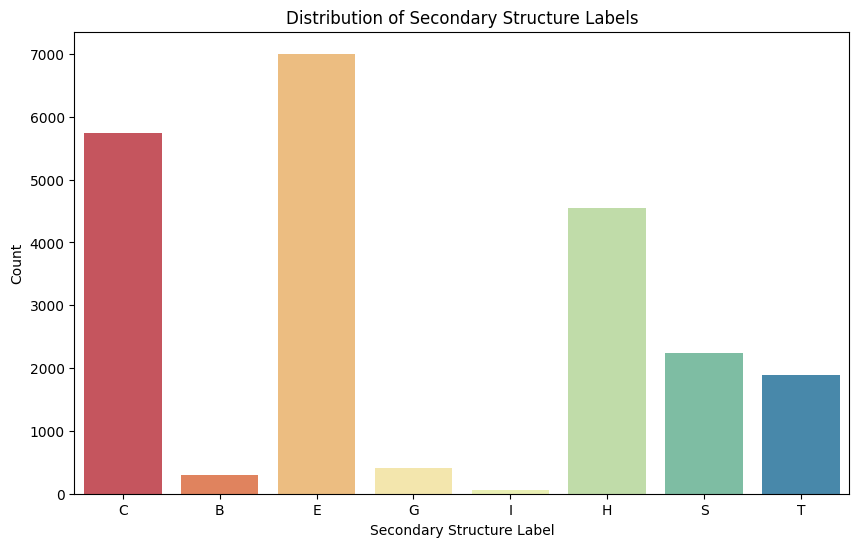

In [13]:
# Plot the distribution of secondary structure labels
def plot_distribution(df_counts):
    """
    Plot the distribution of secondary structure labels
    """
    for i, label in enumerate(secondary_structure_labels):
        n = df_counts[df_counts['label'] == label]['counts'].values[0]
        print(f'{label}: {n}')

    plt.figure(figsize=(10, 6))
    sns.barplot(x='label',
                y='counts',
                palette='Spectral',
                hue='label',
                data=df_counts)
    plt.title('Distribution of Secondary Structure Labels')
    plt.xlabel('Secondary Structure Label')
    plt.ylabel('Count')
    plt.show()

plot_distribution(df_counts)